In [1]:
import pandas as pd
import numpy as np
import os
import itertools
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import math
import itertools as itt
import sys
from collections import deque
import pickle

In [2]:
data= np.loadtxt('C:/Users/Devanshu/Desktop/Project_action/Beef/Beef_TRAIN', delimiter=',')
print(data.shape)

(30, 471)


In [3]:
series_1= data[:,0]
series_2= data[:,9]
series_3= data[:,19]
series_4= data[:,29]

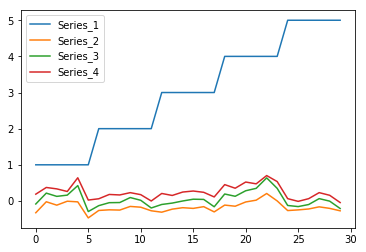

In [4]:
plt.plot(series_1)
plt.plot(series_2)
plt.plot(series_3)
plt.plot(series_4)
plt.legend(('Series_1', 'Series_2', 'Series_3','Series_4'))

plt.show()

In [5]:
query= series_2[0:4]
print(series_2)
print(query)
print(query[::-1])

[-0.32653   -0.022588  -0.11648   -0.0076778 -0.025281  -0.46953
 -0.26314   -0.24559   -0.25265   -0.15168   -0.17298   -0.27203
 -0.31109   -0.22687   -0.18673   -0.20586   -0.15795   -0.30298
 -0.11456   -0.1459    -0.028315   0.021681   0.20591    0.0008072
 -0.26597   -0.24758   -0.22208   -0.16319   -0.20547   -0.27315  ]
[-0.32653   -0.022588  -0.11648   -0.0076778]
[-0.0076778 -0.11648   -0.022588  -0.32653  ]


# Subsequence generator for single query

In [ ]:
def _window_slicer(series_2,window_size):
    
    if len(series_2) % window_size == 0 :   #first check if the time series can be divided into subsequences or not.
        
        print('series is divisible')
        
        query= series_2[0:window_size]      # query is selected from time series
        print('query',query)
        
        other_sequence= list(series_2[window_size::])  #collect the rest of the time series after query is selected
        
        print('other_sequence',other_sequence)
        
        _window_slicer.subsequence=[]     #list to collect all the subsequences of 
        
        for i in range(len(other_sequence)):
            #print(i)
            #print(other_sequence[i])
            new_subsequence= other_sequence[i:i+3] #subsequence range can be set by user. update i+3 to any number to get subsequence
            if len(new_subsequence)!=3 :
                return
            else:
                _window_slicer.subsequence.append(new_subsequence)
                #print('new_subsequence',new_subsequence)
        
    else:
        print('select another window size, window will not divide sequence into equal parts')
    

_window_slicer(series_2,3) #input to the method is time series data and window size to get subsequences
print('Subsequence set',_window_slicer.subsequence)

# Time series subsequence generator for dynamic query

Time series subsequence generated as below

						
						


In [6]:
def _window_slicer(data,window_size):
    
    if len(data) % window_size == 0 :   #first check if the time series can be divided into subsequences or not.
        
        print('series is divisible')
        
        _window_slicer.n_subsequence=[]  # to collect all the subsequence from the time series
        _window_slicer.query=[]
        for i in range(0,len(data),window_size):
            
            for j in range(i, len(data),window_size):      #J+window_size ensures that eveytime the query is generated
                Query= data[j:j+window_size]              #the window_size is kept preserved 
                print('query',Query,'length of query',len(query))
               
                _window_slicer.query.append(Query)
                for k in range(j+window_size, len(data),1): 
                    subsequence=data[k:k+window_size]       
                    #print('left series',k,subsequence)
                    #dist= np.linalg.norm(query-subsequence)
                    #print('distance:',dist)
                    if len(subsequence)!=window_size :
                        print('window discarded')
                    else:
                        _window_slicer.n_subsequence.append(subsequence) #collect subsequences
                        print('accepted')

        

_window_slicer(series_2,3) #input to the method is time series data and window size to get subsequences

print('Query:',_window_slicer.query)

series is divisible
query [-0.32653  -0.022588 -0.11648 ] length of query 4
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
window discarded
window discarded
query [-0.0076778 -0.025281  -0.46953  ] length of query 4
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
window discarded
window discarded
query [-0.26314 -0.24559 -0.25265] length of query 4
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
accepted
window discarded
window discarded
query [-0.15168 -0.17298 -0.27203] length of query 4
accepted
accepted
accepted
accepted
accepted
accepted
accepted


In [7]:
def _window_slicer(data,window_size):
    
    if len(data) % window_size == 0 :   #first check if the time series can be divided into subsequences or not.
        
        #print('series is divisible')
        
        _window_slicer.n_subsequence=[]  # to collect all the subsequence from the time series
        _window_slicer.query=[]
            
        for j in range(0, len(data),window_size): #J+window_size ensures that eveytime the query is generated
            Query= data[j:j+window_size]          #the window_size is kept preserved  
            #print('query',Query,'length of query',len(Query))
            _window_slicer.query.append(Query)
            for k in range(j+window_size, len(data),1): 
                subsequence=data[k:k+window_size]
                #print('subsequence_length',len(subsequence))
                #print('left series',subsequence)
                   
                if len(subsequence)!=window_size :
                    print('window discarded')
                else:
                    print('Query',Query,'length of query',len(Query),'subsequence',subsequence,'subsequence length',len(subsequence))
                    dist= np.linalg.norm(Query-subsequence)
                    print('distance of query to subsequence:',dist)
                    _window_slicer.n_subsequence.append(subsequence) #collect subsequences
                    #print('accepted')

        

_window_slicer(series_2,3) #input to the method is time series data and window size to get subsequences

print('Query:',len(_window_slicer.query))
print('subsequence',_window_slicer.n_subsequence)

Query [-0.32653  -0.022588 -0.11648 ] length of query 3 subsequence [-0.0076778 -0.025281  -0.46953  ] subsequence length 3
distance of query to subsequence: 0.47572920889287423
Query [-0.32653  -0.022588 -0.11648 ] length of query 3 subsequence [-0.025281 -0.46953  -0.26314 ] subsequence length 3
distance of query to subsequence: 0.5585850579499957
Query [-0.32653  -0.022588 -0.11648 ] length of query 3 subsequence [-0.46953 -0.26314 -0.24559] subsequence length 3
distance of query to subsequence: 0.3081941868432953
Query [-0.32653  -0.022588 -0.11648 ] length of query 3 subsequence [-0.26314 -0.24559 -0.25265] subsequence length 3
distance of query to subsequence: 0.26886883977880366
Query [-0.32653  -0.022588 -0.11648 ] length of query 3 subsequence [-0.24559 -0.25265 -0.15168] subsequence length 3
distance of query to subsequence: 0.24641194663408672
Query [-0.32653  -0.022588 -0.11648 ] length of query 3 subsequence [-0.25265 -0.15168 -0.17298] subsequence length 3
distance of que

Query [-0.15168 -0.17298 -0.27203] length of query 3 subsequence [-0.30298 -0.11456 -0.1459 ] subsequence length 3
distance of query to subsequence: 0.20545890903049202
Query [-0.15168 -0.17298 -0.27203] length of query 3 subsequence [-0.11456  -0.1459   -0.028315] subsequence length 3
distance of query to subsequence: 0.24800851200110047
Query [-0.15168 -0.17298 -0.27203] length of query 3 subsequence [-0.1459   -0.028315  0.021681] subsequence length 3
distance of query to subsequence: 0.3274561377436679
Query [-0.15168 -0.17298 -0.27203] length of query 3 subsequence [-0.028315  0.021681  0.20591 ] subsequence length 3
distance of query to subsequence: 0.5306019899566906
Query [-0.15168 -0.17298 -0.27203] length of query 3 subsequence [0.021681  0.20591   0.0008072] subsequence length 3
distance of query to subsequence: 0.49804799580446063
Query [-0.15168 -0.17298 -0.27203] length of query 3 subsequence [ 0.20591    0.0008072 -0.26597  ] subsequence length 3
distance of query to sub

In [ ]:
a= _window_slicer.n_subsequence
print(a[1])

dist= np.linalg.norm(a[0]-a[1])
print(dist)

In [ ]:
def Mass(data,query):
    m= len(data)
    n= len(query)
    
    stdx= np.std(data)
    stdy= np.std(query)
    
    #compute y stats
    meany= np.mean(query)
    sigmay= np.std(query)
    
    #compute x stats
    meanx= pd.rolling_mean(data[m-1:0])
    sigmax= np.std(data[data[m-1:0]])
    
    y = query(::-1) #Reverse query
    y(m+1:n) = 0    #aappend zeros
    
    #The main trick of getting dot products in O(n log n) time
    X = fft(data);
    Y = fft(query);
    Z = np.dot(X,Y)
    z = ifft(Z);
    
    dist = 2*(m-(z(m:n)-m*meanx(m:n)*meany)./(sigmax(m:n)*sigmay));
    dist = math.sqrt(dist);

In [ ]:
l = [[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]]
for i in l:
    print(i)
    l.pop()

In [8]:
data1= pd.read_csv('C:/Users/Devanshu/Desktop/Project_action/nile.csv', sep=',',header=None)

In [9]:
print(data1.head(2))

      0     1
0  1872  1160
1  1873   963


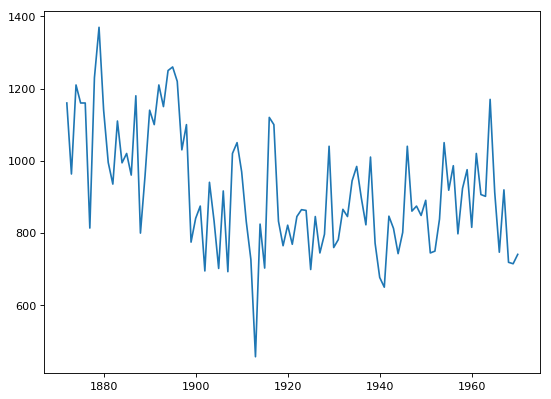

In [12]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data1[0],data1[1])
plt.show()